In [1]:
import numpy as np
from matplotlib import animation
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import pandas as pd
from IPython.display import HTML
from qwanta import Experiment
import matplotlib
import seaborn as sns

In [2]:
# Architecture 1

def distance_to_prob(distance, time):
    p = [1, 0, 0, 0]
    return p

def adjusted_rate(rl, dl, ds, loss=0.1):
    return rl*10**((dl - ds)*loss/10)

minimal_edges_infos = [(0.0001, 100, 100), (0.0001, 175, 25), 
                       (0.0001, 150, 50) ,(0.0001, 125, 75)]
adjusted_rate_list = [adjusted_rate(*i) for i in minimal_edges_infos]

node_number = 3
n_hops = [2]
nodes_name = [f'Node {i}' for i in range(node_number)]
distance_btw = 100 # km
edges_loss = [0.1]*(node_number-1) # dB/km
loss = 0.1

nodes_info_exp = [{
            'Node 0': {'coordinate': (0, 0, 0)},
            'Node 1': {'coordinate': (100, 0, 0)},
            'Node 2': {'coordinate': (200, 0, 0)},
            'numPhysicalBuffer': 20,
            'numInternalEncodingBuffer': 20,
            'numInternalDetectingBuffer': 10,
            'numInternalInterfaceBuffer': 2,
        },
        {
            'Node 0': {'coordinate': (0, 0, 0)},
            'Node 1': {'coordinate': (25, 0, 0)},
            'Node 2': {'coordinate': (200, 0, 0)},
            'numPhysicalBuffer': 20,
            'numInternalEncodingBuffer': 20,
            'numInternalDetectingBuffer': 10,
            'numInternalInterfaceBuffer': 2,
        },
        {  
            'Node 0': {'coordinate': (0, 0, 0)},
            'Node 1': {'coordinate': (50, 0, 0)},
            'Node 2': {'coordinate': (200, 0, 0)},
            'numPhysicalBuffer': 20,
            'numInternalEncodingBuffer': 20,
            'numInternalDetectingBuffer': 10,
            'numInternalInterfaceBuffer': 2,
        },
        {  
            'Node 0': {'coordinate': (0, 0, 0)},
            'Node 1': {'coordinate': (75, 0, 0)},
            'Node 2': {'coordinate': (200, 0, 0)},
            'numPhysicalBuffer': 20,
            'numInternalEncodingBuffer': 20,
            'numInternalDetectingBuffer': 10,
            'numInternalInterfaceBuffer': 2,
        },
]
bias_edge = [{
        ('Node 0', 'Node 1'): {
        'connection-type': 'Space',
        'function': distance_to_prob,
        'loss': loss,
        'light speed': 300000,
        'Pulse rate': adjusted_rate(0.0001, 100, 100, loss=loss),
        },
        ('Node 1', 'Node 2'): {
        'connection-type': 'Space',
        'function': distance_to_prob,
        'loss': loss,
        'light speed': 300000,
        'Pulse rate': 0.0001,
        }
    },
    {
        ('Node 0', 'Node 1'): {
        'connection-type': 'Space',
        'function': distance_to_prob,
        'loss': loss,
        'light speed': 300000,
        'Pulse rate': adjusted_rate(0.0001, 175, 25, loss=loss),
        },
        ('Node 1', 'Node 2'): {
        'connection-type': 'Space',
        'function': distance_to_prob,
        'loss': loss,
        'light speed': 300000,
        'Pulse rate': 0.0001,
        }
    },
    {
        ('Node 0', 'Node 1'): {
        'connection-type': 'Space',
        'function': distance_to_prob,
        'loss': loss,
        'light speed': 300000,
        'Pulse rate': adjusted_rate(0.0001, 150, 50, loss=loss),
        },
        ('Node 1', 'Node 2'): {
        'connection-type': 'Space',
        'function': distance_to_prob,
        'loss': loss,
        'light speed': 300000,
        'Pulse rate': 0.0001,
        }
    },
    {
        ('Node 0', 'Node 1'): {
        'connection-type': 'Space',
        'function': distance_to_prob,
        'loss': loss,
        'light speed': 300000,
        'Pulse rate': adjusted_rate(0.0001, 125, 75, loss=loss),
        },
        ('Node 1', 'Node 2'): {
        'connection-type': 'Space',
        'function': distance_to_prob,
        'loss': loss,
        'light speed': 300000,
        'Pulse rate': 0.0001,
        }
    },
]

e_tl, vis_a = Experiment.read_timeline_from_csv(f'exper_ID9_2hops_1setup_ArcType1.xlsx', excel=True) # exper_id7_Logical_{i}hops.xlsx
exp_names = ['Center-D100-L0_1_adjusted',
             'Bias-Left_D25-L0-1_adjusted',
             'Bias-Left_D50-L0-1_adjusted',
             'Bias-Left_D75-L0-1_adjusted']

timelines = {exp_name: e_tl for exp_name in exp_names}
nodes_information = {exp_name: nodes_info_exp[index] for index, exp_name in enumerate(exp_names)}
networks = {exp_name: bias_edge[index] for index, exp_name in enumerate(exp_names)}
mem_func = {exp_name: None for exp_name in exp_names}
sim_time = {exp_name: None for exp_name in exp_names}
labels = {exp_name: 'k' for exp_name in exp_names}

In [4]:
p = [1]
exper_architecture1 = Experiment(networks, timelines, nodes_info=nodes_information, memFunc=mem_func, simTime=sim_time,
                 photon_channel=p, collect_fidelity_history=False, repeat=10,
                 label_records=labels,path='exp_ID9', message_log='exp_ID9_ArcType1_b_adjusted', progress_bar=True)
exper_architecture1.run()

Experiments executed:   0%|          | 0/4 [00:00<?, ?it/s]

Parameters executed:   0%|          | 0/1 [00:00<?, ?it/s]

Parameters executed:   0%|          | 0/1 [00:00<?, ?it/s]

Parameters executed:   0%|          | 0/1 [00:00<?, ?it/s]

Parameters executed:   0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
# AWTPQ = Average waiting time of each physical qubit encoded to logical qubit
col_name = {'AWTPQ ', 'Node', 'index', 'Experiment'}
experiemnt_results = exper_architecture1.results()
data_list = []
for exp_num, exp_name in enumerate(exp_names):
    for index in range(9000):
        all_mean_qubit_wt_left, all_mean_qubit_wt_right, time = [], [], []
        for repeat in range(10):
            qubits_left = experiemnt_results[exp_name][0][repeat]['Qubits waiting time'][index]['Node 0']
            qubits_right = experiemnt_results[exp_name][0][repeat]['Qubits waiting time'][index]['Node 2']

            mean_qubit_wt_left, mean_qubit_wt_right = np.mean(qubits_left), np.mean(qubits_right)
            all_mean_qubit_wt_left.append(mean_qubit_wt_left)
            all_mean_qubit_wt_right.append(mean_qubit_wt_right)
            time.append(experiemnt_results[exp_name][0][repeat]['Qubits waiting time'][index]['Time'])

        all_mean_time = np.mean(time)
        all_std_time = np.std(time)
        all_mean_left, all_mean_right = np.mean(all_mean_qubit_wt_left), np.mean(all_mean_qubit_wt_right)
        tmp_left = {'Experiment':exp_name, 'AWTPQ': all_mean_left, 'Node': 'Node 0', 'index':index, 'Time':all_mean_time, 'STD': all_std_time}
        tmp_right = {'Experiment':exp_name, 'AWTPQ': all_mean_right, 'Node': 'Node 2', 'index':index, 'Time':all_mean_time, 'STD': all_std_time}
        data_list.append(tmp_left)
        data_list.append(tmp_right)

dataset_architecture1 = pd.DataFrame(data_list)
dataset_architecture1

,Experiment,AWTPQ,Node,index,Time,STD
0,Center-D100-L0_1_adjusted,0.003660,Node 0,0,0.011630,0.003250
1,Center-D100-L0_1_adjusted,0.001750,Node 2,0,0.011630,0.003250
2,Center-D100-L0_1_adjusted,0.003080,Node 0,1,0.018410,0.004352
3,Center-D100-L0_1_adjusted,0.002790,Node 2,1,0.018410,0.004352
4,Center-D100-L0_1_adjusted,0.003310,Node 0,2,0.025960,0.005545
...,...,...,...,...,...,...
71995,Bias-Left_D75-L0-1_adjusted,0.012519,Node 2,8997,113.963572,0.343540
71996,Bias-Left_D75-L0-1_adjusted,0.007673,Node 0,8998,113.976400,0.342357
71997,Bias-Left_D75-L0-1_adjusted,0.011477,Node 2,8998,113.976400,0.342357
71998,Bias-Left_D75-L0-1_adjusted,0.008215,Node 0,8999,113.989019,0.339831


In [ ]:
df = dataset_architecture1
arc = ['Architecture 1']*len(df)
df['Architecture'] = arc
df.to_csv('exp_id9/exp_id9_arch1_b_adjusted_results_df.csv')

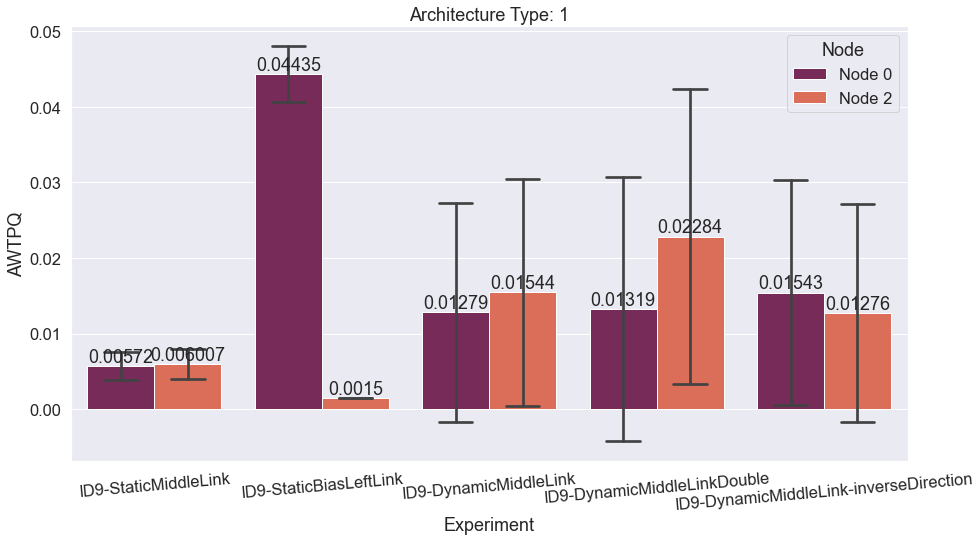

In [13]:
plt.figure(figsize = (15,8))
sns.set(font_scale = 1.5)
ax = sns.barplot(data=dataset_architecture1, x='Experiment', y='AWTPQ', hue='Node', ci='sd',palette="rocket", capsize=0.2)
for p in ax.patches:
    ax.annotate(f'{p.get_height():.4}',
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 5)
#ax.set_ylim(0, 0.005)
ax.set_title('Architecture Type: 1')
plt.savefig('exp_id9/exp_id9_architype1_loss_10repeated.png')

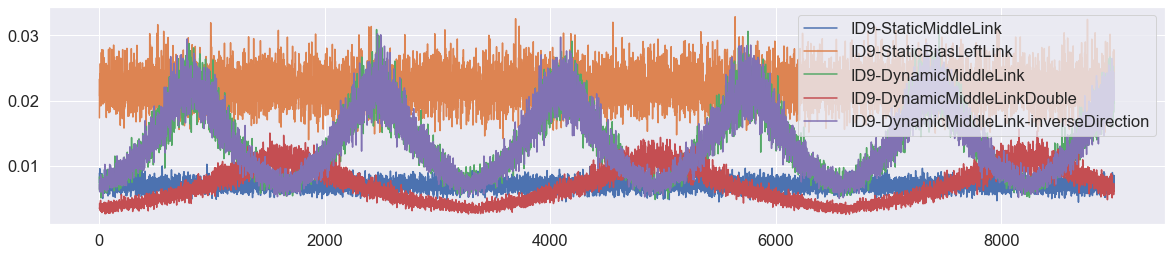

In [14]:
df = dataset_architecture1
plt.figure(figsize = (20,4))
for name in exp_names:
    time_diff_list = df.loc[(df['Experiment'] == name) & (df['Node'] == 'Node 0')]['Time'].diff()
    
    plt.plot(time_diff_list.to_list()[1:], label=name)
plt.legend()
plt.savefig('exp_id9/exp_id9_architype1_time_diff_loss_10repeated.png')

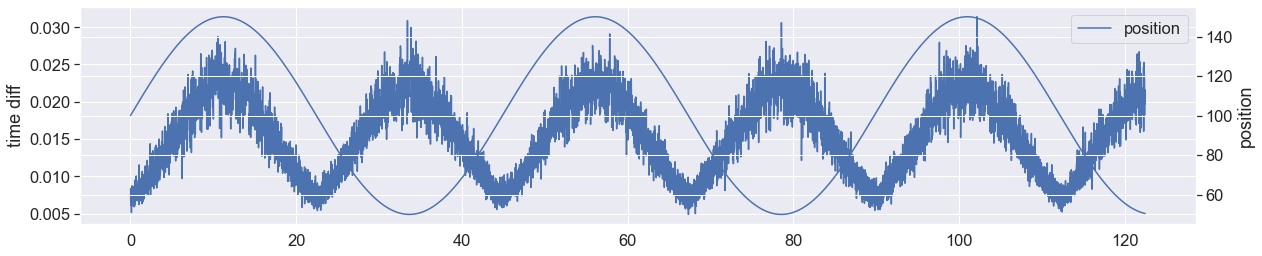

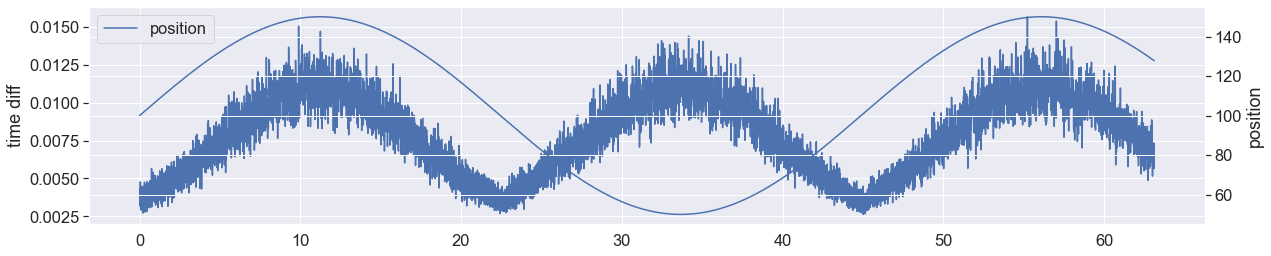

In [12]:
df = dataset_architecture1

for name in ['ID9-DynamicMiddleLink', 'ID9-DynamicMiddleLinkDouble']: # exp_names
    time_stamp = np.array(df.loc[(df['Experiment'] == name) & (df['Node'] == 'Node 0')]['Time'].to_list())
    coordinate_x = time_to_coordinate(time_stamp)[0]
    time_diff_list = df.loc[(df['Experiment'] == name) & (df['Node'] == 'Node 0')]['Time'].diff()
    fig,ax = plt.subplots(figsize = (20,4))
    ax.plot(time_stamp[1:], time_diff_list.to_list()[1:], label='time diff')
    ax.set_ylabel('time diff')
    ax2=ax.twinx()
    ax2.plot(time_stamp, coordinate_x, label='position')
    ax2.set_ylabel('position')
    plt.legend()

In [19]:
df = dataset_architecture1
dummy = []
for name in exp_names:
    first_mean = df.loc[(df['Experiment'] == name) & (df['Node'] == 'Node 0')][['Time', 'STD']].head(1).iloc[0]['Time']
    first_std = df.loc[(df['Experiment'] == name) & (df['Node'] == 'Node 0')][['Time', 'STD']].head(1).iloc[0]['STD']
    last_mean = df.loc[(df['Experiment'] == name) & (df['Node'] == 'Node 0')][['Time', 'STD']].tail(1).iloc[0]['Time']
    last_std = df.loc[(df['Experiment'] == name) & (df['Node'] == 'Node 0')][['Time', 'STD']].tail(1).iloc[0]['STD']
    #print(f'{name}: first: {first_mean} STD: {first_std}, last: {last_mean} STD: {last_std}')
    dummy.append([first_mean, first_std, last_mean, last_std])
    #print(f'{first_mean}\t{first_std}\t{last_mean}\t{last_std}')
np.savetxt('exp_id9/exp_id9_a1_loss.csv', np.array(dummy), delimiter=",")

In [17]:
type(df.loc[(df['Experiment'] == name) & (df['Node'] == 'Node 0')][['Time', 'STD']].head(1).iloc[0]['Time'])

numpy.float64